In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_invalid_zeros] = data[cols_with_invalid_zeros].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
data[cols_with_invalid_zeros] = imputer.fit_transform(data[cols_with_invalid_zeros])

(data == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [47]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [48]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop('Outcome', axis=1).values.astype(np.float32)
y = data['Outcome'].values.astype(np.int64)

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
df = pd.DataFrame(X, columns=data.columns[:-1])
df['Outcome'] = y
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


c:\Users\huber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\huber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'After Scaling')

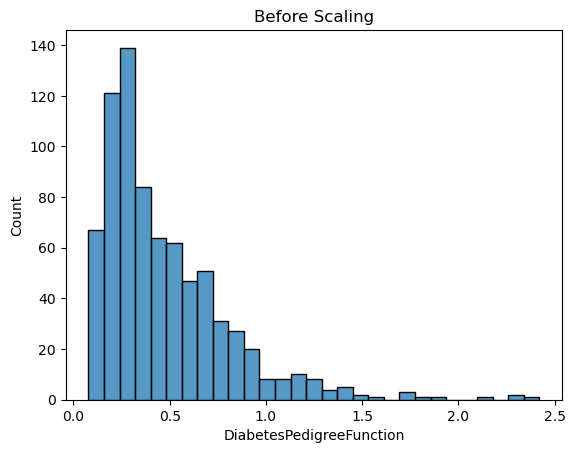

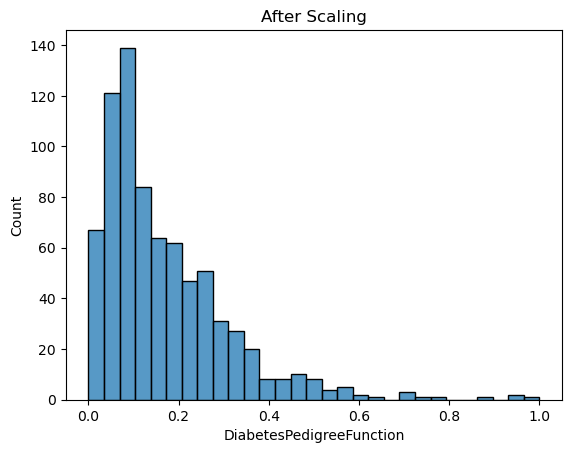

In [49]:
plt.figure()
sns.histplot(data['DiabetesPedigreeFunction'])
plt.title('Before Scaling')
plt.figure()
sns.histplot(df['DiabetesPedigreeFunction'])
plt.title('After Scaling')

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [80]:
import numpy as np

class NeuralNetwork:
    def __init__(
        self,
        input_size,
        hidden_size,
        output_size=1,
        activation="relu",
        learning_rate=0.001,
        momentum=0.9,
        lr_decay=0.5,
        lr_patience=10,
        batch_size=32,
        target_loss=None,
        max_epochs=1000,
        seed=None
    ):
        """
        Dwuwarstwowa sieć neuronowa:
        input -> hidden -> output (sigmoid).
        Przystosowana do klasyfikacji binarnej (output_size=1).
        """
        if seed is not None:
            np.random.seed(seed)

        self.activation_name = activation
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.base_lr = learning_rate
        self.current_lr = learning_rate
        self.momentum = momentum
        self.lr_decay = lr_decay
        self.lr_patience = lr_patience
        self.batch_size = batch_size
        self.target_loss = target_loss
        self.max_epochs = max_epochs

        # Inicjalizacja wag (He dla ReLU, Xavier dla sigmoid)
        if activation == "relu":
            limit1 = np.sqrt(2.0 / input_size)
            self.weights_input_hidden = np.random.randn(input_size, hidden_size) * limit1
        else:
            limit1 = np.sqrt(1.0 / input_size)
            self.weights_input_hidden = np.random.randn(input_size, hidden_size) * limit1

        limit2 = np.sqrt(1.0 / hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * limit2

        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

        # Momentum – wektory prędkości
        self.v_w_ih = np.zeros_like(self.weights_input_hidden)
        self.v_b_h = np.zeros_like(self.bias_hidden)
        self.v_w_ho = np.zeros_like(self.weights_hidden_output)
        self.v_b_o = np.zeros_like(self.bias_output)

        # Miejsce na historię do wykresów
        self.history = {
            "epoch": [],
            "loss_full": [],        # MSE na całym zbiorze uczącym
            "loss_batches": [],     # średni MSE po batchach w epoce
            "class_error_full": [],
            "train_accuracy": [],   # dokładność [%] na całym zbiorze uczącym
            "val_accuracy": [],     # dokładność [%] na całym zbiorze walidacyjnym
            "val_loss": [],         # błąd klasyfikacji [%] na całym zbiorze walidacyjnym    
            "lr": [],               # bieżący learning rate
            "w_ih": [],             # kopia wag input-hidden
            "w_ho": []              # kopia wag hidden-output
        }

    # ===== Funkcje aktywacji =====
    def sigmoid(self, x):
        # Ogranicz wejście przed obliczeniem
        x = np.clip(x, -500, 500)
        result = np.where(
            x >= 0,
            1 / (1 + np.exp(-x)),
            np.exp(x) / (1 + np.exp(x))
        )
        return np.clip(result, 1e-7, 1 - 1e-7)

    def sigmoid_derivative_from_output(self, y):
        # y = sigmoid(x)
        return y * (1.0 - y)

    def relu(self, x):
        return np.maximum(0.0, x)

    def relu_derivative_from_pre(self, x):
        # pochodna po sygnale przed aktywacją (pre-activation)
        return (x > 0.0).astype(float)

    # ===== Propagacja w przód =====
    def feedforward(self, X):
        # warstwa ukryta
        self.z_hidden = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        if self.activation_name == "sigmoid":
            self.a_hidden = self.sigmoid(self.z_hidden)
        elif self.activation_name == "relu":
            self.a_hidden = self.relu(self.z_hidden)
        else:
            raise ValueError("Unsupported activation function")

        # warstwa wyjściowa: sigmoid -> wynik w (0,1)
        self.z_output = np.dot(self.a_hidden, self.weights_hidden_output) + self.bias_output
        self.y_hat = self.sigmoid(self.z_output)
        return self.y_hat

    # ===== Propagacja wstecz + aktualizacja wag (mini-batch) =====
    def backward_batch(self, X_batch, y_batch):
        """
        Jedna aktualizacja dla pojedynczego mini-batcha.
        y_batch ma być w kształcie (batch_size, 1), wartości 0/1.
        """

        m = X_batch.shape[0]  # rozmiar batcha

        # Forward pass dla batcha
        y_hat = self.feedforward(X_batch)

        # MSE = (1/2m) * sum (y_hat - y)^2
        # dL/dy_hat = (y_hat - y) / m
        dL_dy_hat = (y_hat - y_batch) / m

        # Wyjściowa warstwa: sigmoid
        delta_output = dL_dy_hat * self.sigmoid_derivative_from_output(y_hat)

        # Grad dla W_hidden_output i bias_output
        grad_w_ho = np.dot(self.a_hidden.T, delta_output)
        grad_b_o = np.sum(delta_output, axis=0, keepdims=True)

        # Przeniesienie błędu na warstwę ukrytą
        hidden_error = np.dot(delta_output, self.weights_hidden_output.T)
        if self.activation_name == "sigmoid":
            hidden_delta = hidden_error * self.sigmoid_derivative_from_output(self.a_hidden)
        else:  # ReLU
            hidden_delta = hidden_error * self.relu_derivative_from_pre(self.z_hidden)

        grad_w_ih = np.dot(X_batch.T, hidden_delta)
        grad_b_h = np.sum(hidden_delta, axis=0, keepdims=True)

        
        grad_w_ho = np.clip(grad_w_ho, -5, 5)
        grad_b_o = np.clip(grad_b_o, -5, 5)
        grad_w_ih = np.clip(grad_w_ih, -5, 5)
        grad_b_h = np.clip(grad_b_h, -5, 5)
        # ===== Momentum + aktualizacja wag =====
        # W_hidden_output
        self.v_w_ho = self.momentum * self.v_w_ho - self.current_lr * grad_w_ho
        self.weights_hidden_output += self.v_w_ho

        self.v_b_o = self.momentum * self.v_b_o - self.current_lr * grad_b_o
        self.bias_output += self.v_b_o

        # W_input_hidden
        self.v_w_ih = self.momentum * self.v_w_ih - self.current_lr * grad_w_ih
        self.weights_input_hidden += self.v_w_ih

        self.v_b_h = self.momentum * self.v_b_h - self.current_lr * grad_b_h
        self.bias_hidden += self.v_b_h

        # Zwracamy MSE na tym batchu (przyda się do średniej po batchach)
        batch_mse = 0.5 * np.mean((y_hat - y_batch) ** 2)
        return batch_mse

    # ===== Funkcje pomocnicze do metryk =====
    def _compute_full_metrics(self, X, y):
        """
        Liczy MSE i błąd klasyfikacji na całym zbiorze.
        """
        y_hat = self.feedforward(X)
        mse = 0.5 * np.mean((y_hat - y) ** 2)

        # Klasyfikacja binarna: próg 0.5
        y_pred_labels = (y_hat >= 0.5).astype(int)
        class_error = 1.0 - np.mean(y_pred_labels == y)
        return mse, class_error

    # ===== Główna pętla uczenia =====
    def train(self, X, y, X_val=None, y_val=None, verbose=True):
        """
        X: (N, input_size)
        y: (N,) lub (N,1) z wartościami 0/1 (binary classification)
        """

        # Upewniamy się, że y ma kształt (N,1)
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        N = X.shape[0]

        best_loss = np.inf
        epochs_no_improve = 0

        for epoch in range(self.max_epochs):
            # Losowe permutowanie próbek – klasyczne SGD / mini-batch
            perm = np.random.permutation(N)
            X_shuffled = X[perm]
            y_shuffled = y[perm]

            batch_losses = []

            # Iteracja po mini-batchach
            for start in range(0, N, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                if X_batch.shape[0] == 0:
                    continue

                batch_mse = self.backward_batch(X_batch, y_batch)
                batch_losses.append(batch_mse)

            # Metryki na całym zbiorze uczącym
            epoch_loss, epoch_class_error = self._compute_full_metrics(X, y)
            train_accuracy = 1.0 - epoch_class_error
            
            # Metryki na zbiorze walidacyjnym (jeśli istnieje)
            if X_val is not None and y_val is not None:
                val_loss, val_class_error = self._compute_full_metrics(X_val, y_val)
                val_accuracy = 1.0 - val_class_error
            else:
                val_loss = np.nan
                val_accuracy = np.nan

            # Adaptacyjny LR: jeśli brak poprawy, zmniejsz LR
            if epoch_loss < best_loss - 1e-8:
                best_loss = epoch_loss
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= self.lr_patience:
                    self.current_lr *= self.lr_decay
                    epochs_no_improve = 0
                    if verbose:
                        print(f"[Epoch {epoch}] Decreasing LR -> {self.current_lr:.6f}")

            # Early stopping po osiągnięciu target_loss
            if self.target_loss is not None and epoch_loss <= self.target_loss:
                # logowanie przed przerwaniem - DODAJ brakujące argumenty
                self._log_epoch(epoch, epoch_loss, epoch_class_error, batch_losses,
                            train_accuracy, val_loss, val_accuracy)
                if verbose:
                    print(f"Epoch: {epoch} | Loss: {epoch_loss:.6f} | Accuracy: {train_accuracy*100:.2f}%")
                    print(f"[Target loss {self.target_loss} reached. Stopping.]")
                break

            # Logowanie historii
            self._log_epoch(epoch, epoch_loss, epoch_class_error, batch_losses, 
                       train_accuracy, val_loss, val_accuracy)
        
            if verbose:
                if X_val is not None:
                    print(f"Epoch: {epoch} | Loss: {epoch_loss:.6f} | "
                        f"Train Acc: {train_accuracy*100:.2f}% | "
                        f"Val Acc: {val_accuracy*100:.2f}%")
                else:
                    print(f"Epoch: {epoch} | Loss: {epoch_loss:.6f} | "
                        f"Accuracy: {train_accuracy*100:.2f}%")

        # Po zakończeniu treningu - wyświetl metryki walidacyjne
        if verbose and X_val is not None and y_val is not None:
            val_loss, val_err = self._compute_full_metrics(X_val, y_val)
            val_accuracy = 1.0 - val_err
            print("\n" + "="*50)
            print(f"Validation Loss: {val_loss:.6f}")
            print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
            print("="*50)

        return self.history

    def _log_epoch(self, epoch, epoch_loss, epoch_class_error, batch_losses, 
               train_accuracy, val_loss, val_accuracy):
        self.history["epoch"].append(epoch)
        self.history["loss_full"].append(epoch_loss)
        self.history["class_error_full"].append(epoch_class_error)
        self.history["loss_batches"].append(np.mean(batch_losses) if batch_losses else np.nan)
        self.history["train_accuracy"].append(train_accuracy)  # NOWE
        self.history["val_loss"].append(val_loss)              # NOWE
        self.history["val_accuracy"].append(val_accuracy)      # NOWE
        self.history["lr"].append(self.current_lr)
        # kopie wag do późniejszych wykresów
        self.history["w_ih"].append(self.weights_input_hidden.copy())
        self.history["w_ho"].append(self.weights_hidden_output.copy())

    # ===== Predykcja =====
    def predict_proba(self, X):
        """
        Zwraca prawdopodobieństwa klasy 1 (sigmoid).
        """
        return self.feedforward(X)

    def predict(self, X, threshold=0.5):
        """
        Zwraca etykiety 0/1 przy zadanym progu.
        """
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)


In [81]:
nn = NeuralNetwork(
    input_size=X_train.shape[1],
    hidden_size=16,
    output_size=1,
    activation="relu",
    learning_rate=0.001,
    momentum=0.9,
    lr_decay=0.5,
    lr_patience=20,
    batch_size=32,
    target_loss=0.1,   
    max_epochs=2000,
    seed=42
)

history = nn.train(X_train, y_train, X_val=X_val, y_val=y_val, verbose=True)

# Predykcje na zbiorze walidacyjnym
y_val_pred = nn.predict(X_val)
val_acc = (y_val_pred.reshape(-1) == y_val).mean()
print("Validation accuracy:", val_acc)

Epoch: 0 | Loss: 0.122408 | Train Acc: 65.15% | Val Acc: 65.22%
Epoch: 1 | Loss: 0.122268 | Train Acc: 65.15% | Val Acc: 65.22%
Epoch: 2 | Loss: 0.122092 | Train Acc: 65.15% | Val Acc: 65.22%
Epoch: 3 | Loss: 0.121945 | Train Acc: 65.15% | Val Acc: 65.22%
Epoch: 4 | Loss: 0.121777 | Train Acc: 65.15% | Val Acc: 65.22%
Epoch: 5 | Loss: 0.121645 | Train Acc: 65.15% | Val Acc: 65.22%
Epoch: 6 | Loss: 0.121515 | Train Acc: 64.98% | Val Acc: 65.22%
Epoch: 7 | Loss: 0.121412 | Train Acc: 64.98% | Val Acc: 65.22%
Epoch: 8 | Loss: 0.121290 | Train Acc: 64.98% | Val Acc: 65.22%
Epoch: 9 | Loss: 0.121156 | Train Acc: 64.98% | Val Acc: 65.22%
Epoch: 10 | Loss: 0.121028 | Train Acc: 64.98% | Val Acc: 65.22%
Epoch: 11 | Loss: 0.120900 | Train Acc: 64.98% | Val Acc: 65.22%
Epoch: 12 | Loss: 0.120780 | Train Acc: 64.98% | Val Acc: 65.22%
Epoch: 13 | Loss: 0.120685 | Train Acc: 64.98% | Val Acc: 65.22%
Epoch: 14 | Loss: 0.120572 | Train Acc: 65.15% | Val Acc: 65.22%
Epoch: 15 | Loss: 0.120472 | Train 

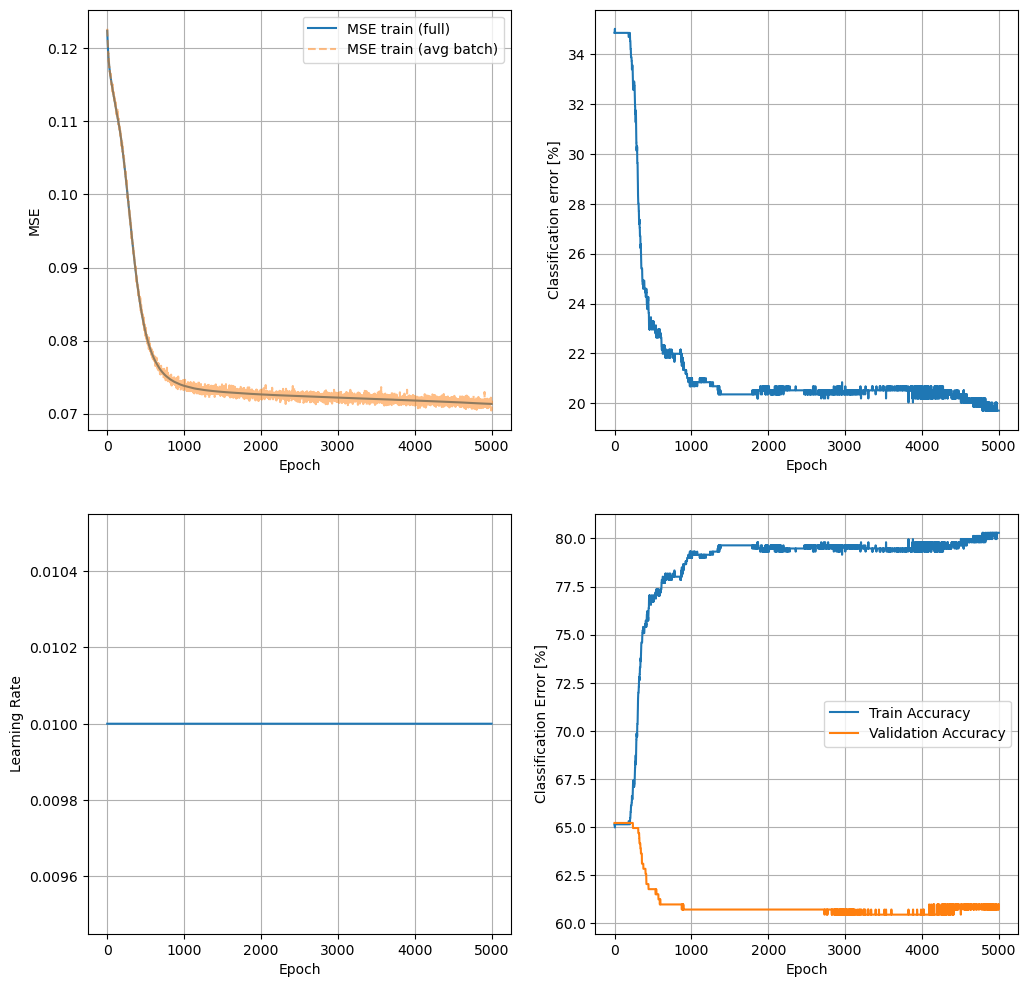

In [78]:

epochs = history["epoch"]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].plot(epochs, history["loss_full"], label="MSE train (full)")
axs[0, 0].plot(epochs, history["loss_batches"], label="MSE train (avg batch)", linestyle="--", alpha=0.5)
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("MSE")
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(epochs, np.array(history["class_error_full"]) * 100.0)
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Classification error [%]")
axs[0, 1].grid(True)

axs[1, 0].plot(epochs, history["lr"])
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("Learning Rate")
axs[1, 0].grid(True)

axs[1, 1].plot(epochs, train_accuracy := np.array(history["train_accuracy"]) * 100, label="Train Accuracy")
axs[1, 1].plot(epochs, val_accuracy := np.array(history["val_accuracy"]) * 100, label="Validation Accuracy")
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_ylabel("Classification Error [%]")
axs[1, 1].legend()
axs[1, 1].grid(True)